<a href="https://colab.research.google.com/github/sidam28/projek_ml/blob/main/FIX_ML_PROJECT_DATA_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan Dataset

Menghubungkan ke google drive, kemudian melakukan pembacaaan dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic Computation
import pandas as pd
import os
import splitfolders
splitted_folder='splitted_folder'
file_path='data'

ModuleNotFoundError: ignored

In [ ]:
!pip install opencv-python

     ---------------------------------------- 35.4/35.4 MB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install split-folders

Melihat Sebaran Dataset

In [ ]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path


In [ ]:
images = []

dirp = "splitted_folder/train/Blight"

for f in os.listdir(file_path):
    images += load_images_from_folder(file_path+'/'+f,True,label = f)
# membuat data frame
df = pd.DataFrame(images, columns = ["fruit", "path"])

In [ ]:
df.head()
df.count()

fruit    4188
path     4188
dtype: int64

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

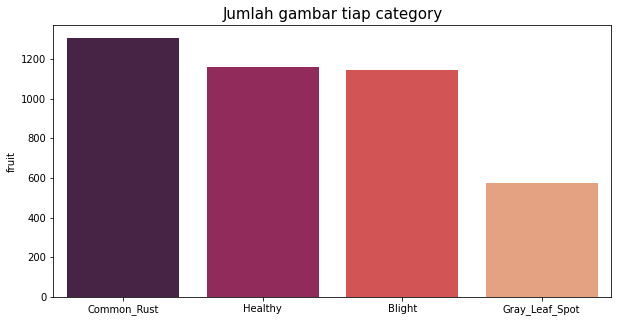

In [ ]:
# menampilkan jumlah gambar pada tiap category
vc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Jumlah gambar tiap category", fontsize = 15)
plt.show()

## Bagi data menjadi 3 
*   train = 80%
*   test = 10%
*   validasi = 10%

In [ ]:
# pembagian dataset menjadi 3 yaitu train,test,val
input_folders = 'data'
output_folders = 'split'
splitfolders.ratio(input_folders,output_folders, seed =42, ratio=(.8,.1,.1))

Sampai sini dataset sudah siap untuk digunakan

# Melakukan import untuk kebutuhan klasifikasi dan preprocessing dataset


In [ ]:
#Import Library untuk preprocessing dataset: 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2 

# Import Library untuk pembuatan arsitektur model
from keras.optimizers import adam_v2
from keras import models
from keras import layers
import tensorflow as tf
# end import klasifikasi

# import libray untuk read data image
import re, glob,numpy as np 

Menyimpan path / folder train, validation, testing


In [ ]:
#Path data train dan data validation 
val_path ='/content/drive/MyDrive/Colab Notebooks/split/val'
training_path ='/content/drive/MyDrive/Colab Notebooks/split/train'

# path data testing
testing_path ='/content/drive/MyDrive/Colab Notebooks/split/test'


In [ ]:


from PIL import Image

Melihat salah satu contoh data, setelah dibagi menjadi 3 folder yaitu train, validation, test

(283, 505, 3)

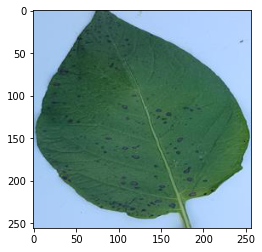

In [ ]:
#melihat salah satu gambar dari data validation
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/split/val/Early_Blight/Early_Blight_1.jpg')
plt.imshow(img)

#melihat ukuran pixel dari salah satu gambar :
cv2.imread('/content/drive/MyDrive/Colab Notebooks/split2/val/Blight/Corn_Blight (15).jpg').shape

# Membuat Dataset generator
untuk melakukan ekstraksi data yang berupa images/citra digital, yang berasal dari sebuah folder menjadi sebuah array yang dapat dibaca oleh tensorflow.
Image data generator berfungsi untuk mengenerate data image dari sebuah file / folder yang telah dibuat sebelumnya.

Mendefinisikan Data generatornya. Dengan params sebagai berikut :
*   Rescaling data menjadi 1/255
*   Shearing image skala 0.2
*   Zooming image dengan range 0.2
*   validation split dengan range 0.2



In [ ]:
#Normalisasi Data / preprocessing : 
training = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              validation_split=0.2)
validation = ImageDataGenerator(rescale=1./255)

testing = ImageDataGenerator(rescale=1./255)

Melakukan preprocessing data / normalisasi data dari params yang kita tentukan diatas. 
*   target size = dimensi dari citra yang akan digunakan dalam proses training
*   batch size = banyaknya citra yang dimasukan dalam setiap steps training.
*   class mode = metode pemilihan klasifikasi.
Contoh class mode: 
  1.   binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
  2.   categorical = 1,2,3,4




In [ ]:
training_dataset = training.flow_from_directory(training_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=True)

validation_dataset = training.flow_from_directory(val_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=True)

testing_dataset = testing.flow_from_directory(testing_path,
                                                target_size=(150,150),
                                                batch_size=16,
                                                class_mode='categorical', shuffle=False)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


Menyimpan label dari dataset

In [ ]:
#Cek Klasifikasi pada tiap tiap label
class_dict = training_dataset.class_indices
class_dict

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [ ]:
#Memasukkan Jenis jenis data ke dalam variable li 
li = list(class_dict.keys())
li

['Early_Blight', 'Healthy', 'Late_Blight']

In [ ]:
#Melihat Klasifikasi pada tiap gambar 
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# Membuat Struktur Convolutional Neural Network


In [ ]:
#CNN MODEL 

model = tf.keras.models.Sequential([
                                    #Feature Extraction Layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(64,activation='relu'),

                                    tf.keras.layers.Dense(3,activation='softmax')
])

#print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

# Compiling Model

In [ ]:
#Compile dengan menggunakan optimzer adam dan categorical_crossentropy untuk menghitung lossnya 
adam = adam_v2.Adam(learning_rate=0.001)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy']) 

# Visualisasi Model

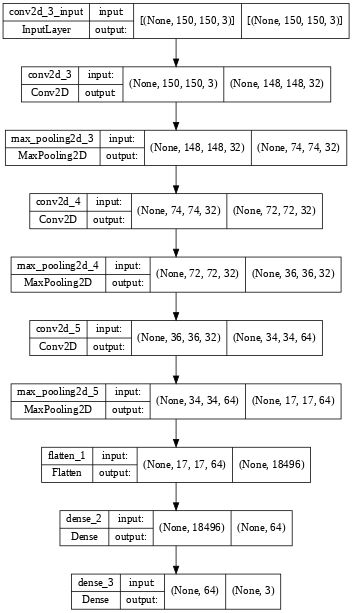

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

# Proses Training Model
Training ini dilakukan dengan beberapa params diantaranya:
*   training_dataset = merupakan data generator yang sudah kita proses  data training.
*   Steps per epoch merupakan banyaknya steps / langkah untuk menyelesaikan 1 epoch, disini 1 steps merupakan 1 batch_size / 1 batch_size adalah 16 citra, seperti yang sudah di definisikan diatas.
*   epoch = banyaknya proses iterasi/ pengulangan pada training
*   val_data = validation data yang dievaluasi pada setiap epoch berakhir.

In [ ]:
history = model.fit(training_dataset,
          steps_per_epoch=10,
          epochs=120,
          validation_data = validation_dataset)

Epoch 1/120
10/10 [==============================] - 119s 13s/step - loss: 1.1914 - accuracy: 0.3812 - val_loss: 1.0868 - val_accuracy: 0.3726
Epoch 2/120
10/10 [==============================] - 31s 3s/step - loss: 1.0657 - accuracy: 0.4062 - val_loss: 1.0685 - val_accuracy: 0.4784
Epoch 3/120
10/10 [==============================] - 29s 3s/step - loss: 1.0887 - accuracy: 0.4250 - val_loss: 1.0539 - val_accuracy: 0.4519
Epoch 4/120
10/10 [==============================] - 29s 3s/step - loss: 1.0620 - accuracy: 0.4437 - val_loss: 1.0354 - val_accuracy: 0.4832
Epoch 5/120
10/10 [==============================] - 28s 3s/step - loss: 1.0399 - accuracy: 0.4812 - val_loss: 1.0032 - val_accuracy: 0.4519
Epoch 6/120
10/10 [==============================] - 28s 3s/step - loss: 0.9983 - accuracy: 0.5000 - val_loss: 1.0226 - val_accuracy: 0.4038
Epoch 7/120
10/10 [==============================] - 26s 3s/step - loss: 1.0521 - accuracy: 0.4375 - val_loss: 1.0220 - val_accuracy: 0.4183
Epoch 8/120

# Plot training
pada plot ini dimunculkan berdasarkan accuracy dan loss

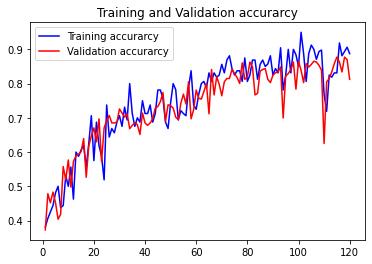

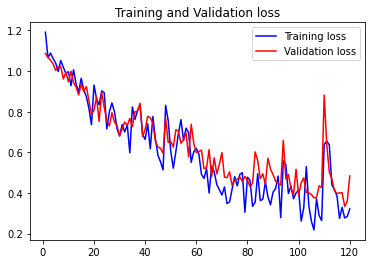

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Simpan Model

In [ ]:
filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/model_save.hdf5"
model.save(filepath)

#save weightnya 
model.save_weights('/content/drive/MyDrive/Colab Notebooks/saved_models/weights.h5')

# Load Model

In [ ]:
my_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/saved_models/model_save.hdf5", compile = True)

# Evaluate Model

In [ ]:
# mmenghitung jumlah epoch 
test_steps_per_epoch = np.math.ceil(testing_dataset.samples / testing_dataset.batch_size)
test_steps_per_epoch

26

In [ ]:
# membuat prediksi dari data testing
pred = my_model.predict_generator(testing_dataset, steps=test_steps_per_epoch)
pred = np.argmax(pred,axis=1)
pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,

In [ ]:
# menyimpan data label yang benar
true_labels = testing_dataset.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# metric evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# membuat confusion matrix berdasarkan data prediksi dan label yang benar
cm = confusion_matrix(true_labels, pred)
cm

array([[129,  29,   4],
       [  9,  93,   0],
       [ 13,   6, 122]])

Text(0.5, 1.0, 'Confusion Matrix Plot')

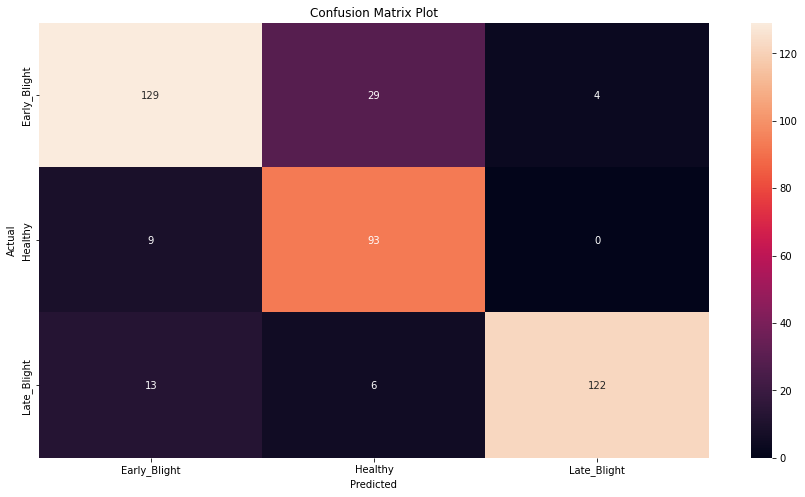

In [ ]:
labels = li
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")

In [ ]:
# Get the accuracy on the test set
acc = accuracy_score(true_labels,pred)
print(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Accuracy on the test set: 84.94%


In [ ]:
print("[INFO] Calculating model accuracy")
scores = my_model.evaluate(validation_dataset)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
26/26 [==============================] - 4s 146ms/step - loss: 0.4802 - accuracy: 0.8077
Test Accuracy: 80.7692289352417


In [ ]:
fruits_acc = np.arange(5).astype('float64')

for i in range(3) :
    fruits_acc[i] = cm[i,i] / sum(cm[i]) * 100
    fruits_acc[i] = round(fruits_acc[i], 2)

#akurasi keseluruhan
fruits_acc[3] = round(accuracy_score(true_labels, pred) *100)
fruits_acc

array([79.63, 91.18, 86.52, 85.  ,  4.  ])

In [ ]:
lab_a = list.copy(li)
lab_a.append('Total')
print(lab_a)

['Early_Blight', 'Healthy', 'Late_Blight', 'Total']


In [ ]:

df_accuracy = pd.DataFrame({"Label":lab_a, "Accuracy":fruits_acc}).set_index("Label")
df_accuracy

ValueError: ignored

In [ ]:
print('Classification Report')
print(classification_report(true_labels, pred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

Early_Blight       0.85      0.80      0.82       162
     Healthy       0.73      0.91      0.81       102
 Late_Blight       0.97      0.87      0.91       141

    accuracy                           0.85       405
   macro avg       0.85      0.86      0.85       405
weighted avg       0.86      0.85      0.85       405



# Prediksi
Prediksi ini dibagi menjadi 3 yaitu 
1.   Upload file
2.   Membaca ke gambar secara langsung
3.   Membaca file 1 folder



In [ ]:
from PIL import Image, ImageOps

In [ ]:
#Memasukkan Jenis jenis data ke dalam variable li 
# li = ['Apple', 'Carambola', 'Plum', 'Tomatoes']

In [ ]:
# predicting by upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  image_path = fn
  size= (150,150)
  image = Image.open(image_path)
  new_image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image = np.asarray(image)
  image = np.expand_dims(image,axis=0)
  image = image/255
  prediction = my_model.predict(image)
  prediction = np.argmax(prediction)
  className = li[prediction]

  #ploting image with predicted class name        
  plt.figure(figsize = (4,4))
  plt.imshow(new_image)
  #plt.axis('off')
  plt.title(className)
  plt.show()  

ModuleNotFoundError: No module named 'google.colab'

Hasil Prediksi :


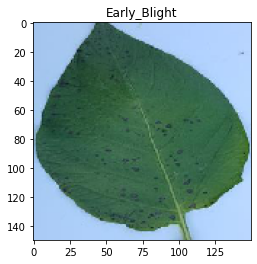

In [ ]:
# predicting an image

image_path = '/content/drive/MyDrive/Colab Notebooks/split/val/Early_Blight/Early_Blight_1.jpg'

new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Hasil Prediksi :")
prediction = my_model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
#plt.axis('off')
plt.title(class_name)
plt.show()  


In [ ]:
#prediksi dalam beberapa gambar di apple
image_path = '/content/drive/MyDrive/Colab Notebooks/split/val/Early_Blight'

for i in os.listdir(image_path):
  prediction = my_model.predict(img)
  new_img = image.load_img(image_path+'//'+i, target_size=(150, 150))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  d = prediction.flatten()
  j = d.max()
  for index,item in enumerate(d):
      if item == j:
          class_name = li[index]

  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  #plt.axis('off')
  plt.title(class_name)
  plt.show()  

  